## **Classification Problem**

Inside this code, have

1.  **Random Forest Classifier**
2.  **KN-Neighbors Classifier**
3.  **Support vector machine**
4.  **Decision Tree**


# Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from IPython.display import Image
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("data.csv")

In [4]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# Exploratory Data Analysis

In [8]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [9]:
colours=["#f7b2b0","#8f7198", "#003f5c"]

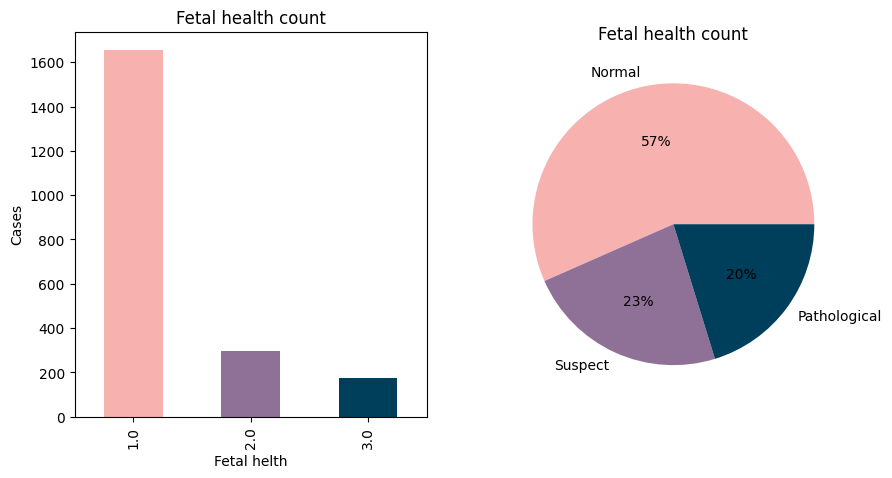

In [10]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

plt.figure(figsize = (14,8))
plt.subplot(121)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = colours)
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.subplot(122)
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = colours, autopct="%1.0f%%")
plt.title("Fetal health count")


plt.show()

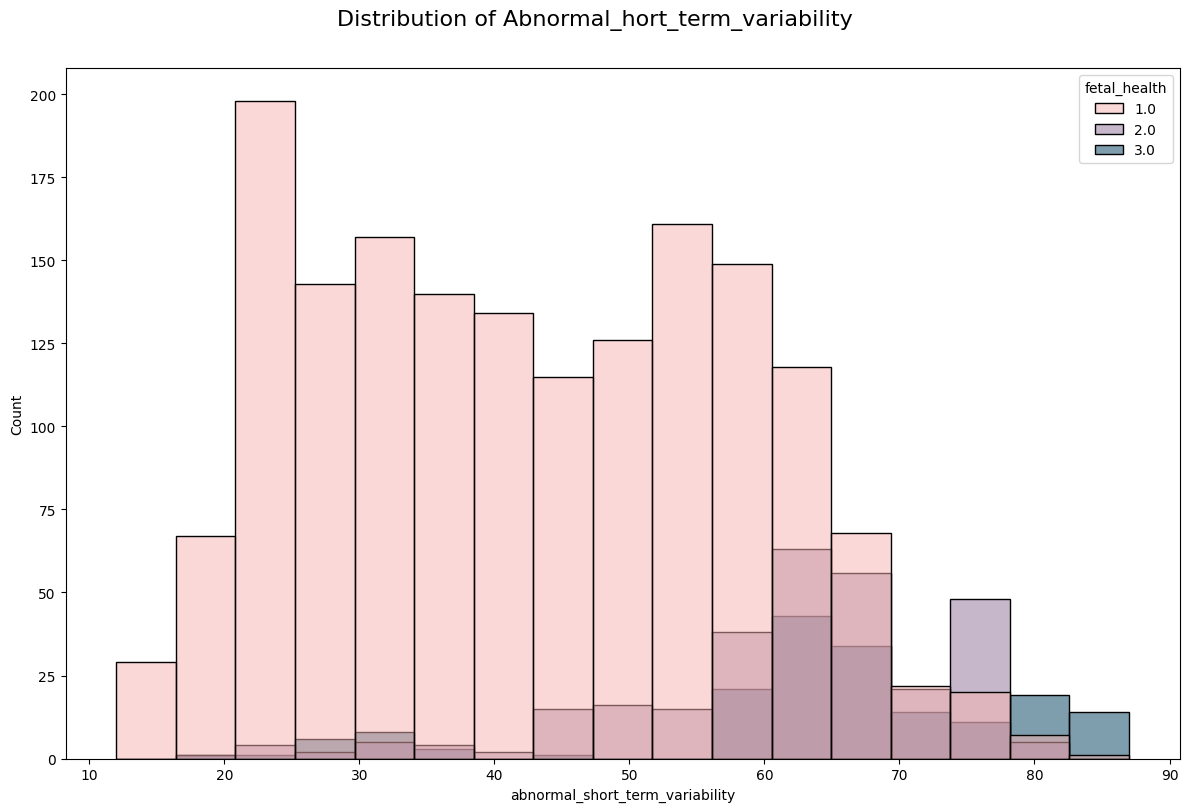

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x='abnormal_short_term_variability', hue='fetal_health', palette=colours)
plt.suptitle('Distribution of Abnormal_hort_term_variability', size=16, y=1.01)
plt.tight_layout()
plt.show()

# Model Building

In [12]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [13]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [14]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [15]:
print(y)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64


In [16]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=42)

### RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix

In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
model_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, model_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [20]:
model_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, model_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9605263157894737


In [40]:
comp = pd.DataFrame(
    {"Y_pred":model_test_prediction,
     "Y_test":y_test}
)

comp.to_csv('file1.csv')

array([[407,  10,   2],
       [  5,  70,   1],
       [  1,   2,  34]])

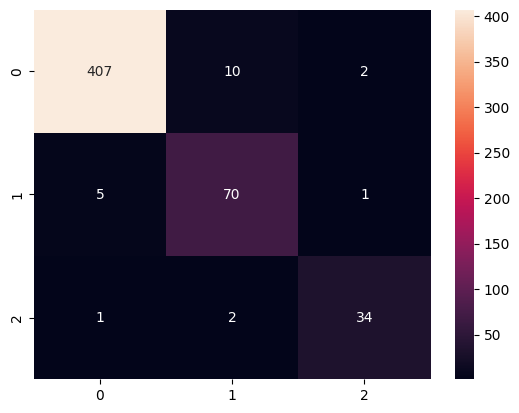

In [22]:
cm=confusion_matrix(model.predict(X_test),y_test)
sns.heatmap(cm,annot=True, fmt='g')
cm

### KN-Neighbors Classifier

In [23]:
model_2=KNeighborsClassifier(n_neighbors=3)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
model_2_train_score=model_2.score(X_train,y_train)
print('Accuracy score of training data : ',model_2_train_score)

Accuracy score of training data :  0.9485570890840652


In [25]:
modul_2_pred=model_2.predict(X_test)

In [26]:
knn_pred_score=accuracy_score(y_test,modul_2_pred)
print('Accuracy score of test data : ',knn_pred_score)

Accuracy score of test data :  0.9229323308270677


<Axes: >

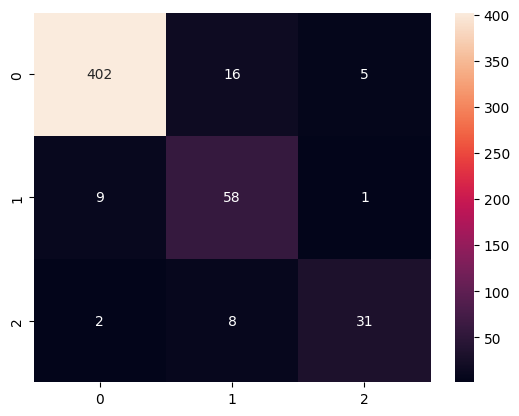

In [27]:
cm=confusion_matrix(model_2.predict(X_test),y_test)
sns.heatmap(cm,annot=True, fmt='g')

### Support vector machine

In [28]:
model_3 = svm.SVC(kernel='rbf')

In [29]:
# training the SVM model with training data
model_3.fit(X_train,y_train)

SVC()

In [30]:
model_3_train_score=model_3.score(X_train,y_train)
print('Accuracy score of training data : ',model_3_train_score)

Accuracy score of training data :  0.9316185696361355


In [31]:
modul_3_pred=model_3.predict(X_test)

In [32]:
svm_pred_score=accuracy_score(y_test,modul_3_pred)
print('Accuracy score of test data : ',svm_pred_score)

Accuracy score of test data :  0.9172932330827067


### Decision Tree

In [33]:
model_4 = DecisionTreeClassifier()

In [34]:
model_4.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
model_4_train_score=model_4.score(X_train,y_train)
print('Accuracy score of training data : ',model_4_train_score)

Accuracy score of training data :  1.0


In [36]:
modul_4_pred=model_4.predict(X_test)

In [37]:
dt_pred_score=accuracy_score(y_test,modul_4_pred)
print('Accuracy score of test data : ',dt_pred_score)

Accuracy score of test data :  0.9323308270676691


### Results

In [38]:
result=pd.DataFrame(columns=['Algorithm','Training-Result','Predictive-Result'])

In [39]:
m=['KN-Neighbors Classifier', model_2_train_score, knn_pred_score]
result.loc[0]=m
m = ['Random Forest', training_data_accuracy, test_data_accuracy]
result.loc[1]=m
m = ['Support Vector Machine', model_3_train_score, svm_pred_score]
result.loc[2]=m
m = ['Decision Tree Classifier', model_4_train_score, dt_pred_score]
result.loc[3]=m

result

,Algorithm,Training-Result,Predictive-Result
0,KN-Neighbors Classifier,0.948557,0.922932
1,Random Forest,1.000000,0.960526
2,Support Vector Machine,0.931619,0.917293
3,Decision Tree Classifier,1.000000,0.932331
